In [6]:
import pystan
import arviz

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


In [3]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']

## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)

/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backend

/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backend

array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'tau'}>,
        <AxesSubplot:title={'center':'tau'}>],
       [<AxesSubplot:title={'center':'eta\n0'}>,
        <AxesSubplot:title={'center':'eta\n0'}>],
       [<AxesSubplot:title={'center':'eta\n1'}>,
        <AxesSubplot:title={'center':'eta\n1'}>],
       [<AxesSubplot:title={'center':'eta\n2'}>,
        <AxesSubplot:title={'center':'eta\n2'}>],
       [<AxesSubplot:title={'center':'eta\n3'}>,
        <AxesSubplot:title={'center':'eta\n3'}>],
       [<AxesSubplot:title={'center':'eta\n4'}>,
        <AxesSubplot:title={'center':'eta\n4'}>],
       [<AxesSubplot:title={'center':'eta\n5'}>,
        <AxesSubplot:title={'center':'eta\n5'}>],
       [<AxesSubplot:title={'center':'eta\n6'}>,
        <AxesSubplot:title={'center':'eta\n6'}>],
       [<AxesSubplot:title={'center':'eta\n7'}>,
        <AxesSubplot:title={'center':'eta\n7'}>],
       [<AxesSubplot:tit

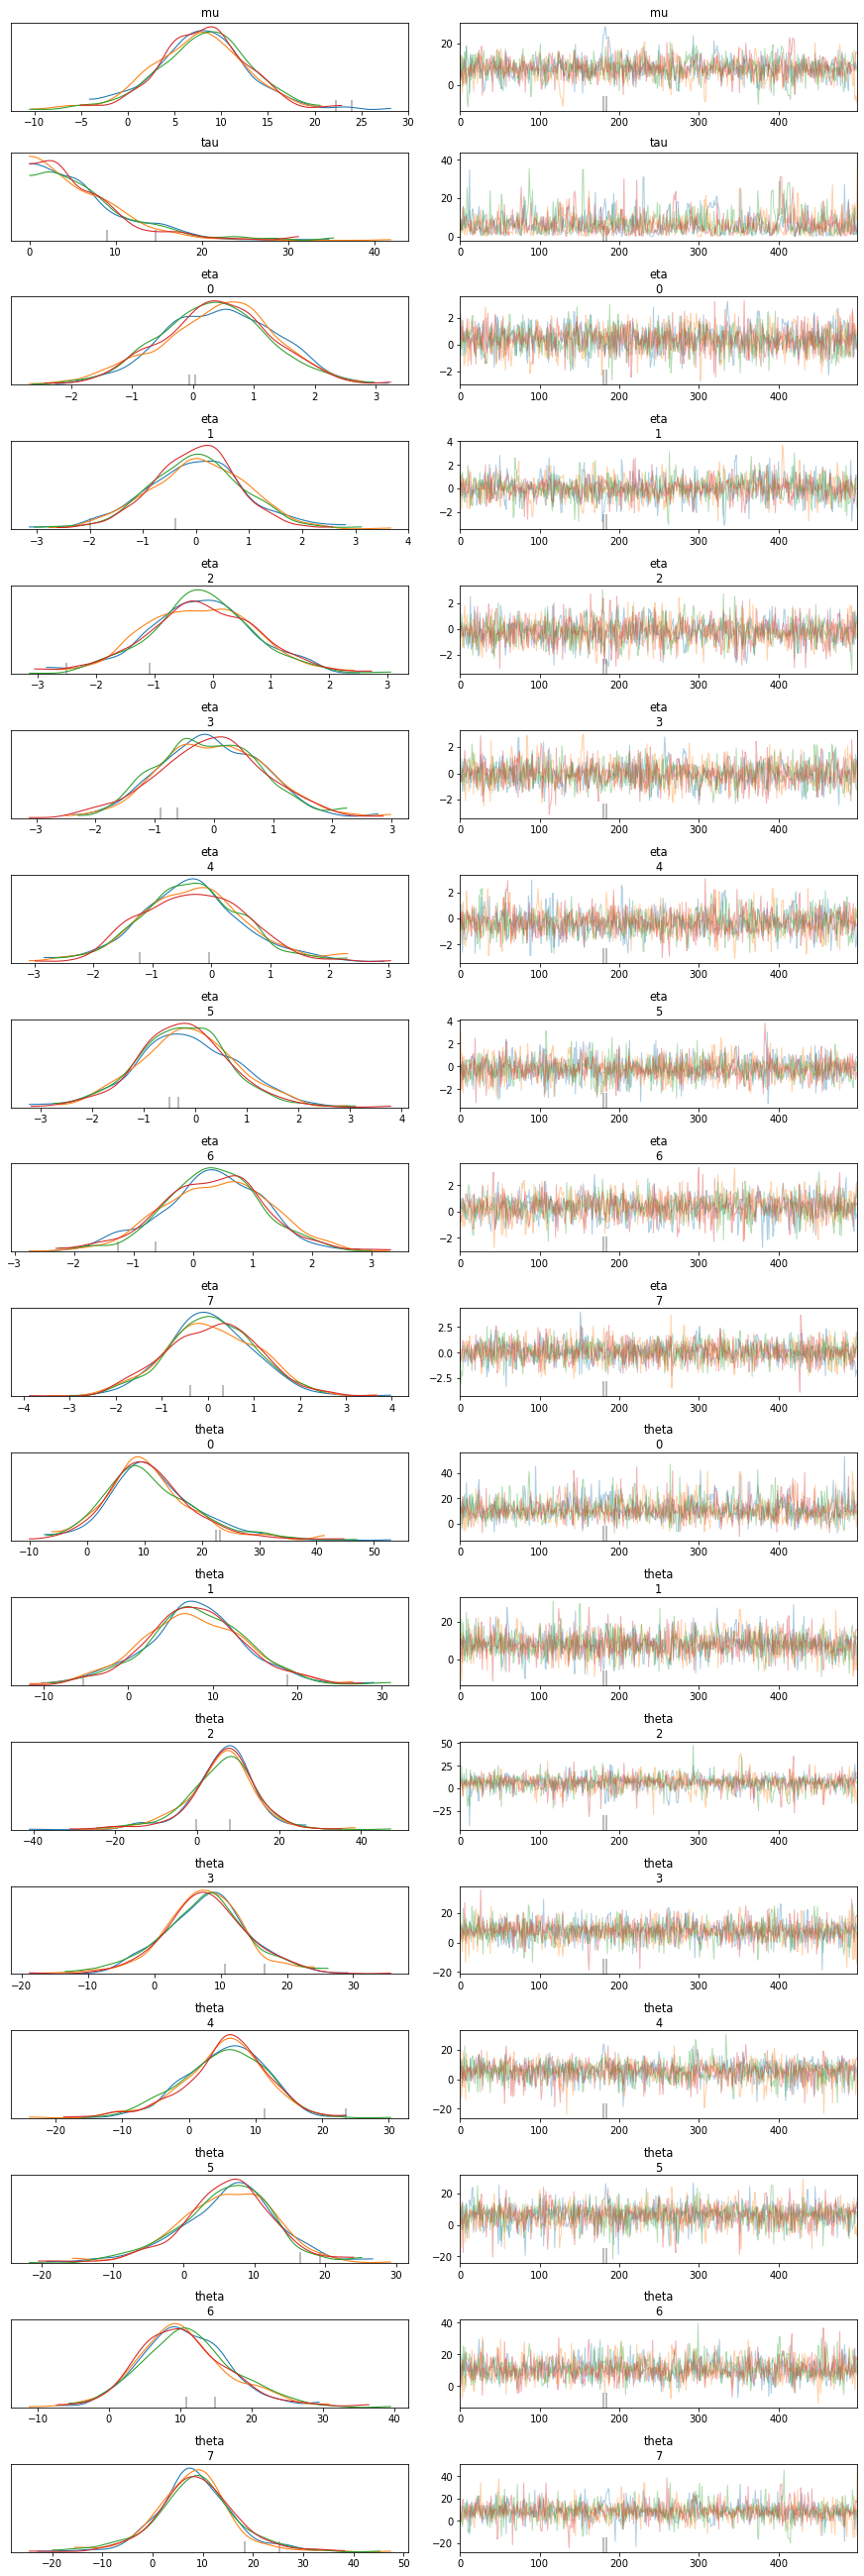

In [7]:
arviz.plot_trace(fit)